In [20]:
import diffrax as dfx
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from dynamical_systems.continuous.fitzhugh import FitzhughNagumo


jax.config.update("jax_enable_x64", True)
plt.style.use("matplotlib_utils.styles.dash_gridded")

In [21]:
ode = FitzhughNagumo()

u0 = jnp.asarray([1.0, 0.0])
t = jnp.linspace(0, 100, 1000)
sol = dfx.diffeqsolve(
    dfx.ODETerm(ode.rhs),
    dfx.Tsit5(),
    t[0],
    t[-1],
    None,
    u0,
    stepsize_controller=dfx.PIDController(rtol=1e-6, atol=1e-6),
    saveat=dfx.SaveAt(ts=t),
)

Text(0, 0.5, '$y$')

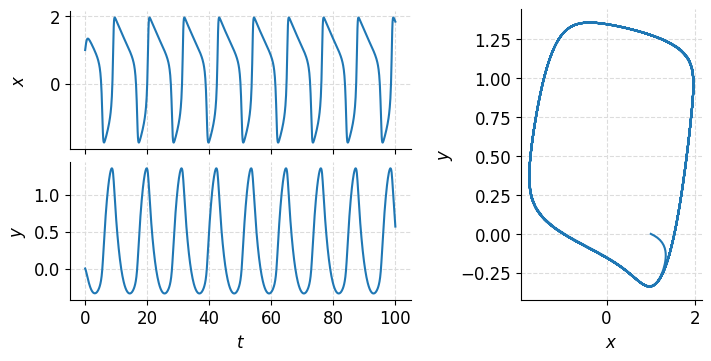

In [25]:
fig = plt.figure(figsize=(7, 3.5), layout="constrained")
subfigs = fig.subfigures(1, 2, width_ratios=(1.5, 1), wspace=0.05)
axes = subfigs[0].subplots(2, 1, sharex=True)
for i, (ax, y_name) in enumerate(zip(axes, ("x", "y"))):
    ax.plot(t, sol.ys[:, i])
    ax.set_ylabel(f"${y_name}$")
axes[-1].set_xlabel("$t$")
subfigs[0].align_ylabels()

ax = subfigs[1].subplots(1, 1)
ax.plot(*sol.ys.T)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
